In [1]:
using Distributions
using Optim
using PyPlot;

  likely near In[1]:3
in jl_IO_seek at /home/scottc/.julia/v0.5/PyCall/src/io.jl
  likely near In[1]:3
in jl_IO_seek at /home/scottc/.julia/v0.5/PyCall/src/io.jl
  likely near In[1]:3
in jl_IO_seek at /home/scottc/.julia/v0.5/PyCall/src/io.jl


### Exercise 1.6 (pp. 17–18)

The male and female progeny of light brown apple moths, females in the first column, males in the second for sixteen groups of progeny.

In [2]:
Y = [
    18 11;
    31 22;
    34 27;
    33 29;
    27 24;
    33 29;
    28 25;
    23 26;
    33 38;
    12 14;
    19 23;
    25 31;
    14 20;
    4 6;
    22 34;
    7 12
    ];

(a) The proportion of females in each of the groups.

In [3]:
ProportionOfFemales = Y[:, 1] ./ mapslices(sum, Y, 2)

16x1 Array{Float64,2}:
 0.62069 
 0.584906
 0.557377
 0.532258
 0.529412
 0.532258
 0.528302
 0.469388
 0.464789
 0.461538
 0.452381
 0.446429
 0.411765
 0.4     
 0.392857
 0.368421

(b) Let $Y_i$ denote the number of females and $n_i$ the number of progency in each group.

Suppose the $Y_i$'s are independent random variables each with the Binomial distribution

$$p(y_i; \theta) = \begin{pmatrix} n_i \\ y_i \end{pmatrix} \theta^{y_i} (1-\theta)^{n_i - y_i}.$$

The log likelihood function is

$$\ell(\theta; Y) = \sum_i \log \begin{pmatrix} n_i \\ y_i \end{pmatrix} + \sum_i y_i \log \theta + \sum_i (n_i - y_i) \log (1-\theta).$$

Differentiating wrt $\theta$, we have

$$\frac{d}{d\theta}\ell(\theta; Y) = \frac{\sum_i y_i}{\theta} - \frac{\sum_i n_i - \sum_i y_i}{1-\theta}.$$

Setting the derivative equal to zero and solving for $\theta$ we have that

$$ \sum_i y_i (1-\theta) - \sum_i (n_i - y_i)\theta = 0 $$

and so

$$ \theta = \frac{\sum_i y_i}{\sum_i n_i}.$$

In [4]:
θ = sum(Y[:, 1]) / sum(Y)

0.494550408719346

To solve numerically, we optimise the log likelihood equation as follows. We ignore the constant factor, $\sum_i \log \begin{pmatrix} n_i \\ y_i \end{pmatrix}$.

In [5]:
function l(θ)
    sum(Y[:, 1]) * log(θ) + (sum(Y) - sum(Y[:, 1])) * log(1- θ)
end;

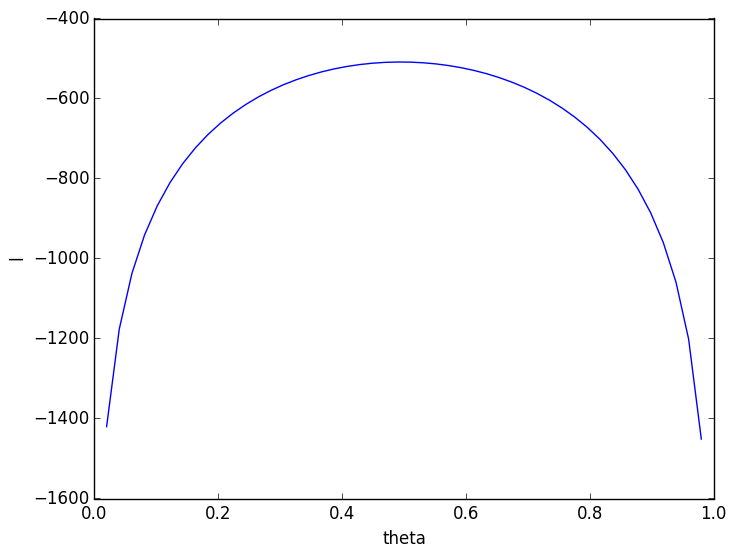

In [6]:
x = linspace(0, 1)

y = Array{Float64}(size(x))

for i in eachindex(x)
    y[i] = l(x[i])
end

p = plot(x, y)
xlabel("theta")
ylabel("l");

In [7]:
θ̂ = optimize((θ) -> -l(θ), 0, 1).minimum

0.49455041400737015

In [8]:
θ - θ̂

-5.288024129690427e-9